# Exercises for Introduction to Python for Data Science

Week 09 - Matplotlib

Matthias Feurer and Andreas Bender  
2025-01-07

In this sheet we will get hands‑on practice with **Matplotlib**. The
four exercises build on one another: we start with a very simple line
plot and gradually move towards multi‑panel figures and
publication‑ready styling.

**Learning goals**

-   Create basic line and histogram plots.
-   Add error bars, legends, axis labels, titles and annotations.
-   Adjust axis limits, tick formatting and log scales.
-   Combine several axes in the same figure.

# Common imports

Run this cell once; it is reused in all subsequent exercises.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')  # make sure we start from a clean state

# Exercise 1 – *Simple line plot*

Create a line plot of the function (f(x)=(x)) for (x ) sampled at 50
points. Then:

1.  Name the x‑axis “x” and the y‑axis “sin(x)”.
2.  Give the plot the title *Sine wave*.
3.  Make sure a grid is visible.

A skeleton is provided — fill in the `<TODO>` parts.

In [2]:
# Exercise 1 -- your code here
# x = np.linspace(0, 10, 50)
# y = np.sin(x)

# fig, ax = plt.subplots()
# ax.plot(<TODO>)                 # line plot
# ax.set_xlabel(<TODO>)           # label x‑axis
# ax.set_ylabel(<TODO>)           # label y‑axis
# ax.set_title(<TODO>)            # add a title
# <TODO>                          # add a grid
# fig.tight_layout()
# plt.show()

## Solution Exercise 1

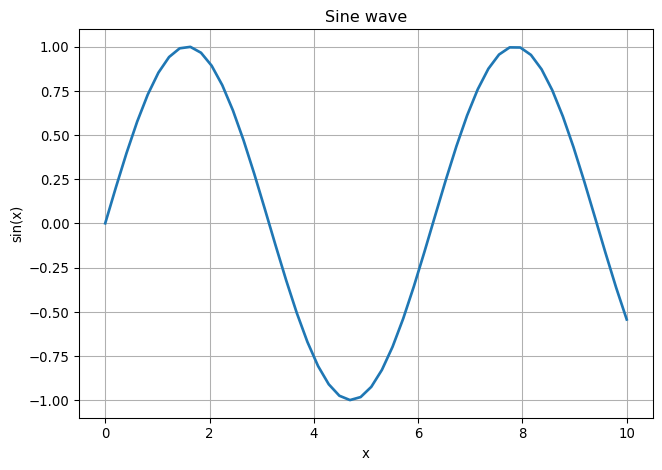

In [3]:
# Solution Exercise 1
x = np.linspace(0, 10, 50)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, color="tab:blue", lw=2)
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")
ax.set_title("Sine wave")
ax.grid(True)
fig.tight_layout()
plt.show()

# Exercise 2 – *Histogram and density*

1.  Draw 1000 samples from a normal distribution with mean 0 and
    standard deviation 1. Plot a histogram with 30 equal‑width bins
    *and* the corresponding kernel density estimate (KDE) in the same
    axes. Use the `density=True` argument for the histogram so that both
    curves are on the same scale.

2.  In a second step add the cumulative histogram (CDF) of the same data
    on a *secondary y‑axis* on the right.

3.  Add a legend that cleanly distinguishes the PDF (hist + KDE) from
    the CDF.

In [4]:
# Exercise 2 -- your code here
# rng = np.random.default_rng(0)
# data = <TODO>

# fig, ax1 = plt.subplots()

# # (a) histogram + KDE
# counts, bins, patches = ax1.hist(<TODO>, alpha=0.4, label= <TODO>)

# # KDE using a simple Gaussian kernel (roll your own)
# from scipy.stats import gaussian_kde
# kde = gaussian_kde(data)
# xs = np.linspace(bins.min(), bins.max(), 301)
# ax1.plot(xs, <TODO>, lw=2, label= <TODO>)
# ax1.set_xlabel("value")
# ax1.set_ylabel("PDF")

# # (b) cumulative histogram on secondary axis
# ax2 = ax1.twinx()
# ax2.hist(<TODO>, histtype='step', lw=2, label="CDF", color="tab:green")
# ax2.set_ylabel("CDF")

# # (c) combine legends from both axes
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(<TODO>, loc="upper left")

# fig.tight_layout()
# plt.show()

## Solution Exercise 2

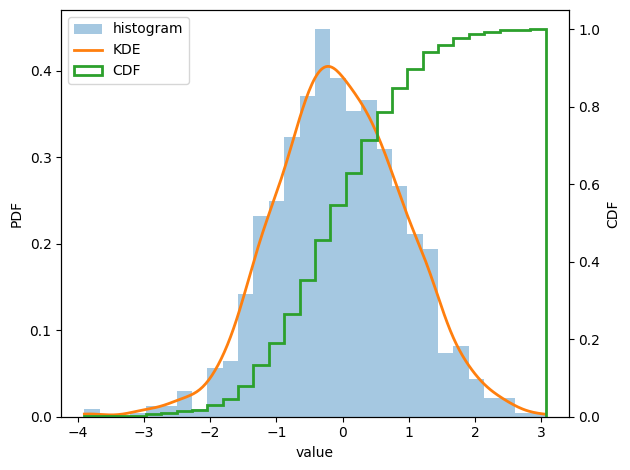

In [3]:
# Solution Exercise 2
rng = np.random.default_rng(0)
data = rng.normal(size=1000)

fig, ax1 = plt.subplots()

# PDF: histogram + KDE
counts, bins, patches = ax1.hist(data, bins=30, density=True, alpha=0.4,
                                 label="histogram")

from scipy.stats import gaussian_kde
kde = gaussian_kde(data)
xs = np.linspace(bins.min(), bins.max(), 301)
ax1.plot(xs, kde(xs), lw=2, label="KDE")
ax1.set_xlabel("value")
ax1.set_ylabel("PDF")

# CDF on secondary axis
ax2 = ax1.twinx()
ax2.hist(data, bins=bins, density=True, histtype='step', cumulative=True,
         lw=2, label="CDF", color="tab:green")
ax2.set_ylabel("CDF")

# merge legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

fig.tight_layout()
plt.show()

# Exercise 3 – *Scatter plot with error bars*

We collected (fabricated) body‑height and body‑mass measurements of 20
individuals, each with a small measurement error.

Plot the data as a *scatter plot* with x‑error bars (height error) and
y‑error bars (weight error). Use triangles (`marker='^'`) and a single
colour of your choice. Label the axes and place the legend in the lower
right corner. Try to make the figure look tidy (`fig.tight_layout()` and
reasonable axis limits).

In [6]:
# Exercise 3 -- your code here

# height_cm = np.array([157,160,163,165,167,168,170,172,174,176,
#                       178,179,181,183,185,187,189,191,192,195])
# weight_kg = np.array([52,55,54,57,60,61,63,65,67,70,
#                       71,73,75,78,80,83,85,86,88,90])
# height_err = 0.8
# weight_err = 1.0

# fig, ax = plt.subplots(figsize=(4,4))
# ax.errorbar(<TODO>, <TODO>, xerr=<TODO>, yerr=<TODO>, fmt=<TODO>,
#             mec=<TODO>, mfc='tab:orange', elinewidth=1, capsize=3,
#             label="subjects")
# ax.set_xlabel(<TODO>)
# ax.set_ylabel(<TODO>)
# ax.legend(loc=<TODO>)
# ax.set_xlim(<TODO>, <TODO>)
# ax.set_ylim(50, 95)
# ax.grid(True, linestyle=':')
# fig.tight_layout()
# plt.show()

## Solution Exercise 3

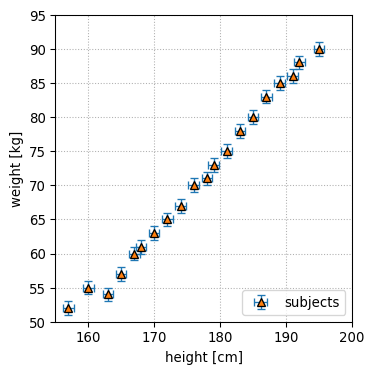

In [7]:
# Solution Exercise 3

height_cm = np.array([157,160,163,165,167,168,170,172,174,176,
                      178,179,181,183,185,187,189,191,192,195])
weight_kg = np.array([52,55,54,57,60,61,63,65,67,70,
                      71,73,75,78,80,83,85,86,88,90])
height_err = 0.8
weight_err = 1.0

fig, ax = plt.subplots(figsize=(4,4))
ax.errorbar(height_cm, weight_kg, xerr=height_err, yerr=weight_err, fmt='^',
            mec='black', mfc='tab:orange', elinewidth=1, capsize=3,
            label="subjects")
ax.set_xlabel("height [cm]")
ax.set_ylabel("weight [kg]")
ax.legend(loc="lower right")
ax.set_xlim(155, 200)
ax.set_ylim(50, 95)
ax.grid(True, linestyle=':')
fig.tight_layout()
plt.show()

# Exercise 4 – *Multiple subplots & styles*

1.  Generate two synthetic data sets:

-   `normal` – 500 samples from a normal distribution with mean 5 and
    standard deviation 1.
-   `lognormal` – 500 samples from a log‑normal distribution with *the
    same* mean and standard deviation (hint: use
    `np.random.lognormal(mean, sigma)` – you have to find suitable
    *mean* and *sigma* for the underlying normal – no need to be exact).

1.  Create a *figure with two rows* (`nrows=2, ncols=1`) that shares the
    x‑axis. For the upper subplot draw a histogram of `normal`. For the
    lower subplot draw a histogram of `lognormal` but *on a logarithmic
    x scale*.

2.  Write the code such that the *first* plot uses Matplotlib’s default
    style, while before drawing the *second* plot you switch to the
    `"ggplot"` style sheet using `plt.style.use("ggplot")`.

In [8]:
# Exercise 4 -- your code here
# rng = np.random.default_rng(42)
# normal = rng.normal(<TODO>)
# lognormal = rng.lognormal(mean=<TODO>, sigma=<TODO>, size=<TODO>)

# fig, (ax_top, ax_bottom) = plt.subplots(<TODO>, figsize=(5,6))

# # default style for top subplot
# ax_top.hist(<TODO>, bins=30, color="tab:blue", alpha=0.6)
# ax_top.set_title("Normal distribution")
# ax_top.set_ylabel("frequency")

# # switch style for bottom subplot
# <TODO>
# ax_bottom.hist(<TODO>, bins=30)
# ax_bottom.set_title("Log‑normal distribution (log‑x)")
# ax_bottom.set_xlabel("value")
# ax_bottom.set_ylabel("frequency")
# ax_bottom.set_xscale(<TODO>)

# fig.tight_layout()
# plt.show()

## Solution Exercise 4

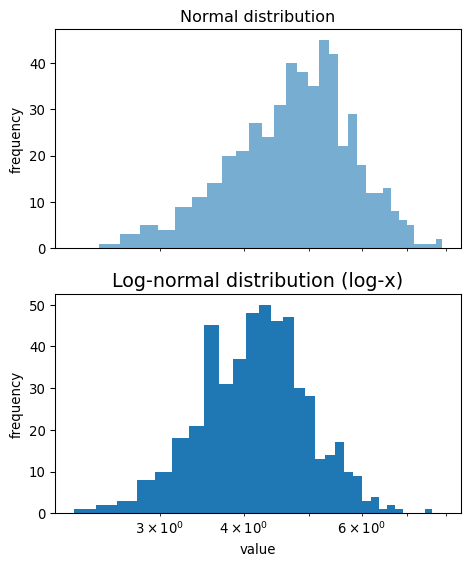

In [9]:
# Solution Exercise 4
rng = np.random.default_rng(42)
normal = rng.normal(loc=5, scale=1, size=500)
# For a log‑normal with approximately mean 5 and std 1 we choose μ≈1.46, σ≈0.18
mu, sigma = 1.46, 0.18
lognormal = rng.lognormal(mean=mu, sigma=sigma, size=500)

fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, sharex=True,
                                        figsize=(5,6))

# default style (classic) for top plot
ax_top.hist(normal, bins=30, color="tab:blue", alpha=0.6)
ax_top.set_title("Normal distribution")
ax_top.set_ylabel("frequency")

# switch to ggplot for bottom plot
plt.style.use("ggplot")
ax_bottom.hist(lognormal, bins=30)
ax_bottom.set_title("Log‑normal distribution (log‑x)")
ax_bottom.set_xlabel("value")
ax_bottom.set_ylabel("frequency")
ax_bottom.set_xscale("log")

fig.tight_layout()
plt.show()